#Этап 1
Подгружаем необходимые библиотеки и подключаем их

In [1]:
!pip install PM4Py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26114 sha256=84577935fa7f283294fb5ec4ee8c9be046db9a86b57e43c3dc96687480a574ad
  Stored in directory: /root/.cache/pip/wheels/ab/fa/1b/75d9a713279796785711bd0bad8334aaace560c0bd28830c8c
  Created wheel for stringdist: filename=StringDist-1.0.9-cp39-cp39-linux_x86_64.whl size=24710 sha256=1e03d1f0473a5018e0bc138fc6ce23c0e094d8ed2cd8ecc7fea6c7192efc7076
  Stored in directory: /root/.cache/pip/wheels/77/24/44/b12b9612fd07e141e6b4f1bb2001c621515bd0cac1014a783a
Successfully built intervaltree stringdist


In [2]:
import pm4py
import pandas as pd
from PIL import Image
import numpy as np

#Этап 2
Получаем данные из csv файла и проводим необходимые преобразования над данными в таблице

In [3]:
log = pd.read_csv('/content/drive/MyDrive/CourseProject/Test_2/helpdesk.csv', sep=',')
log["CaseID"]=log["CaseID"].apply(str)
log["ActivityID"]=log["ActivityID"].apply(str)
log['CompleteTimestamp']= pd.to_datetime(log['CompleteTimestamp'])
log = log.assign(Activity_Name =lambda x: "Activity_" + x.ActivityID)
log = log[['Activity_Name', 'CaseID', 'CompleteTimestamp']]
log

,Activity_Name,CaseID,CompleteTimestamp
0,Activity_1,2,2012-04-03 16:55:38
1,Activity_8,2,2012-04-03 16:55:53
2,Activity_6,2,2012-04-05 17:15:52
3,Activity_1,3,2010-10-29 18:14:06
4,Activity_8,3,2010-11-04 01:16:11
...,...,...,...
13705,Activity_8,4579,2010-07-26 21:31:59
13706,Activity_6,4579,2010-07-26 21:32:11
13707,Activity_8,4580,2012-01-03 18:33:43
13708,Activity_9,4580,2012-01-11 00:30:11


Дополнительно решил построить сеть Петри по данному логу при помощи inductive miner


<ipython-input-7-304a771e2da5>:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  format_df = pm4py.format_dataframe(log, case_id = 'CaseID', activity_key = 'Activity_Name', timestamp_key = 'CompleteTimestamp')
/usr/local/lib/python3.9/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


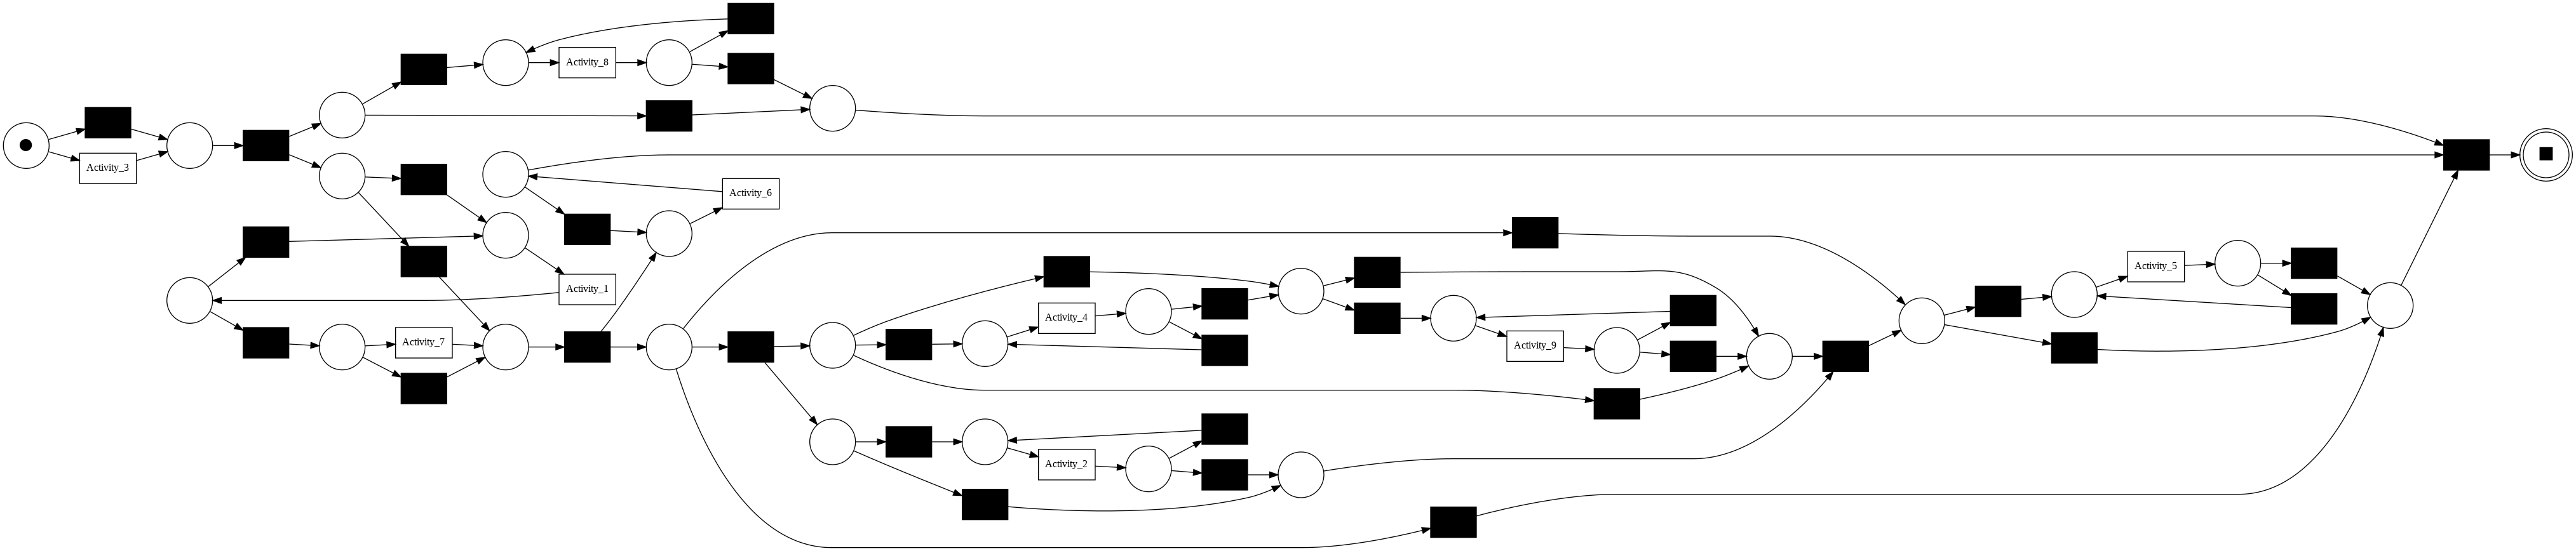

In [7]:
format_df = pm4py.format_dataframe(log, case_id = 'CaseID', activity_key = 'Activity_Name', timestamp_key = 'CompleteTimestamp')
event_log = pm4py.convert_to_event_log(format_df)
net, im, fm = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(net, im, fm, format = 'png')

Получаем уникальные активити и проводим соответствие между активностью и целым числом

In [8]:
# получаем уникальные активити
activities = list(log['Activity_Name'].unique())
act_dict = {}

# проводим соответствие между номером и активити
act_num = len(activities)
for i in range(act_num):
  act_dict[activities[i-1]] = i

act_dict

{'Activity_7': 0,
 'Activity_1': 1,
 'Activity_8': 2,
 'Activity_6': 3,
 'Activity_3': 4,
 'Activity_9': 5,
 'Activity_2': 6,
 'Activity_4': 7,
 'Activity_5': 8}

#Этап 3
Получаем из лога массив трасс

In [9]:
ids = list(log['CaseID'].unique())
case_logs = []
max_trace_len = 0
for id in ids:
  case_log = log.query("`{0}` == @id".format('CaseID'))
  case_log.sort_values(by=['CompleteTimestamp'])
  recoded_trace = []
  for act in case_log['Activity_Name'].to_numpy():
    recoded_trace.append(act_dict[act])

  case_logs.append(recoded_trace)
  if (len(recoded_trace) > max_trace_len):
    max_trace_len = len(recoded_trace)


In [10]:
case_logs

[[1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [4, 1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 5, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 5, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 3],
 [1, 2, 3],
 [1, 2, 3, 3, 2, 5, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [4, 1, 2, 3],
 [1, 2, 5, 3],
 [1, 2, 3, 3],
 [1, 2, 5, 3],
 [1, 2, 3],
 [1, 2, 5, 5, 2, 3],
 [1, 2, 5, 3],
 [1, 3],
 [1, 2, 3],
 [1, 2, 3, 3],
 [1, 2, 5, 2, 3],
 [1, 2, 3],
 [1, 3],
 [1, 1, 5, 2, 5, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 5, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 3],
 [3],
 [1, 1, 2, 3],
 [1, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 5, 5, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 5, 3],
 [1, 2, 5, 3, 2, 5, 3],
 [1, 1, 5, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3],
 [1, 2, 3, 3],
 [1, 2, 3],
 [1, 2, 3],
 [4, 1, 2, 3]

Преобразуем массив трасс к множеству библиотеки numpy и сортируем их по длинне

In [11]:
np_case_logs = np.unique(case_logs).tolist()
np_case_logs.sort(key=len)
np_case_logs

/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


[[3],
 [1, 3],
 [2, 3],
 [5, 3],
 [1, 1, 3],
 [1, 2, 3],
 [1, 3, 3],
 [1, 5, 3],
 [2, 3, 3],
 [2, 5, 3],
 [3, 2, 3],
 [4, 2, 3],
 [6, 8, 3],
 [1, 1, 1, 3],
 [1, 1, 2, 3],
 [1, 2, 0, 3],
 [1, 2, 2, 3],
 [1, 2, 3, 3],
 [1, 2, 5, 3],
 [1, 2, 6, 3],
 [1, 2, 7, 3],
 [1, 2, 8, 3],
 [1, 3, 2, 3],
 [1, 3, 3, 3],
 [1, 5, 2, 3],
 [1, 5, 3, 3],
 [1, 5, 5, 3],
 [2, 2, 2, 3],
 [2, 3, 3, 3],
 [2, 5, 5, 3],
 [4, 1, 2, 3],
 [1, 1, 1, 2, 3],
 [1, 1, 2, 0, 3],
 [1, 1, 2, 2, 3],
 [1, 1, 2, 3, 3],
 [1, 1, 2, 5, 3],
 [1, 1, 2, 6, 3],
 [1, 1, 5, 2, 3],
 [1, 2, 2, 0, 3],
 [1, 2, 2, 2, 3],
 [1, 2, 2, 5, 3],
 [1, 2, 2, 6, 3],
 [1, 2, 2, 7, 3],
 [1, 2, 3, 2, 3],
 [1, 2, 3, 5, 3],
 [1, 2, 5, 2, 3],
 [1, 2, 5, 3, 3],
 [1, 2, 5, 5, 3],
 [1, 2, 6, 6, 3],
 [1, 2, 6, 7, 3],
 [1, 2, 7, 6, 3],
 [1, 3, 5, 5, 3],
 [1, 5, 2, 3, 3],
 [1, 5, 5, 2, 3],
 [2, 5, 2, 3, 3],
 [4, 1, 1, 2, 3],
 [4, 1, 2, 3, 3],
 [4, 1, 2, 6, 3],
 [1, 1, 1, 1, 2, 3],
 [1, 1, 1, 2, 3, 3],
 [1, 1, 1, 2, 5, 3],
 [1, 1, 1, 5, 2, 3],
 [1, 1, 2, 3, 2, 3]

Производим паддинг нулями, чтобы все трассы были одинакового размера

In [12]:
# паддинг нулями
for trace in np_case_logs:
  if (len(trace) < max_trace_len):
    trace.extend([0]*(max_trace_len-len(trace)))

#Этап 4
Строим изображение по матрице полученной из numpy множества 

У каждого event в трассе свой ID, ID данного activity. 

Здесь мы также нормализуем матрицу, то есть переводим её значения в шкалу от 0 до 255. И далее, при помощи библиотека PIL преобразуем матрицу в изображение.

[[ 95   0   0 ...   0   0   0]
 [ 31  95   0 ...   0   0   0]
 [ 63  95   0 ...   0   0   0]
 ...
 [ 31  63 159 ...  95   0   0]
 [ 31  63 159 ...  63  95   0]
 [ 31 159  63 ... 159  63  95]]


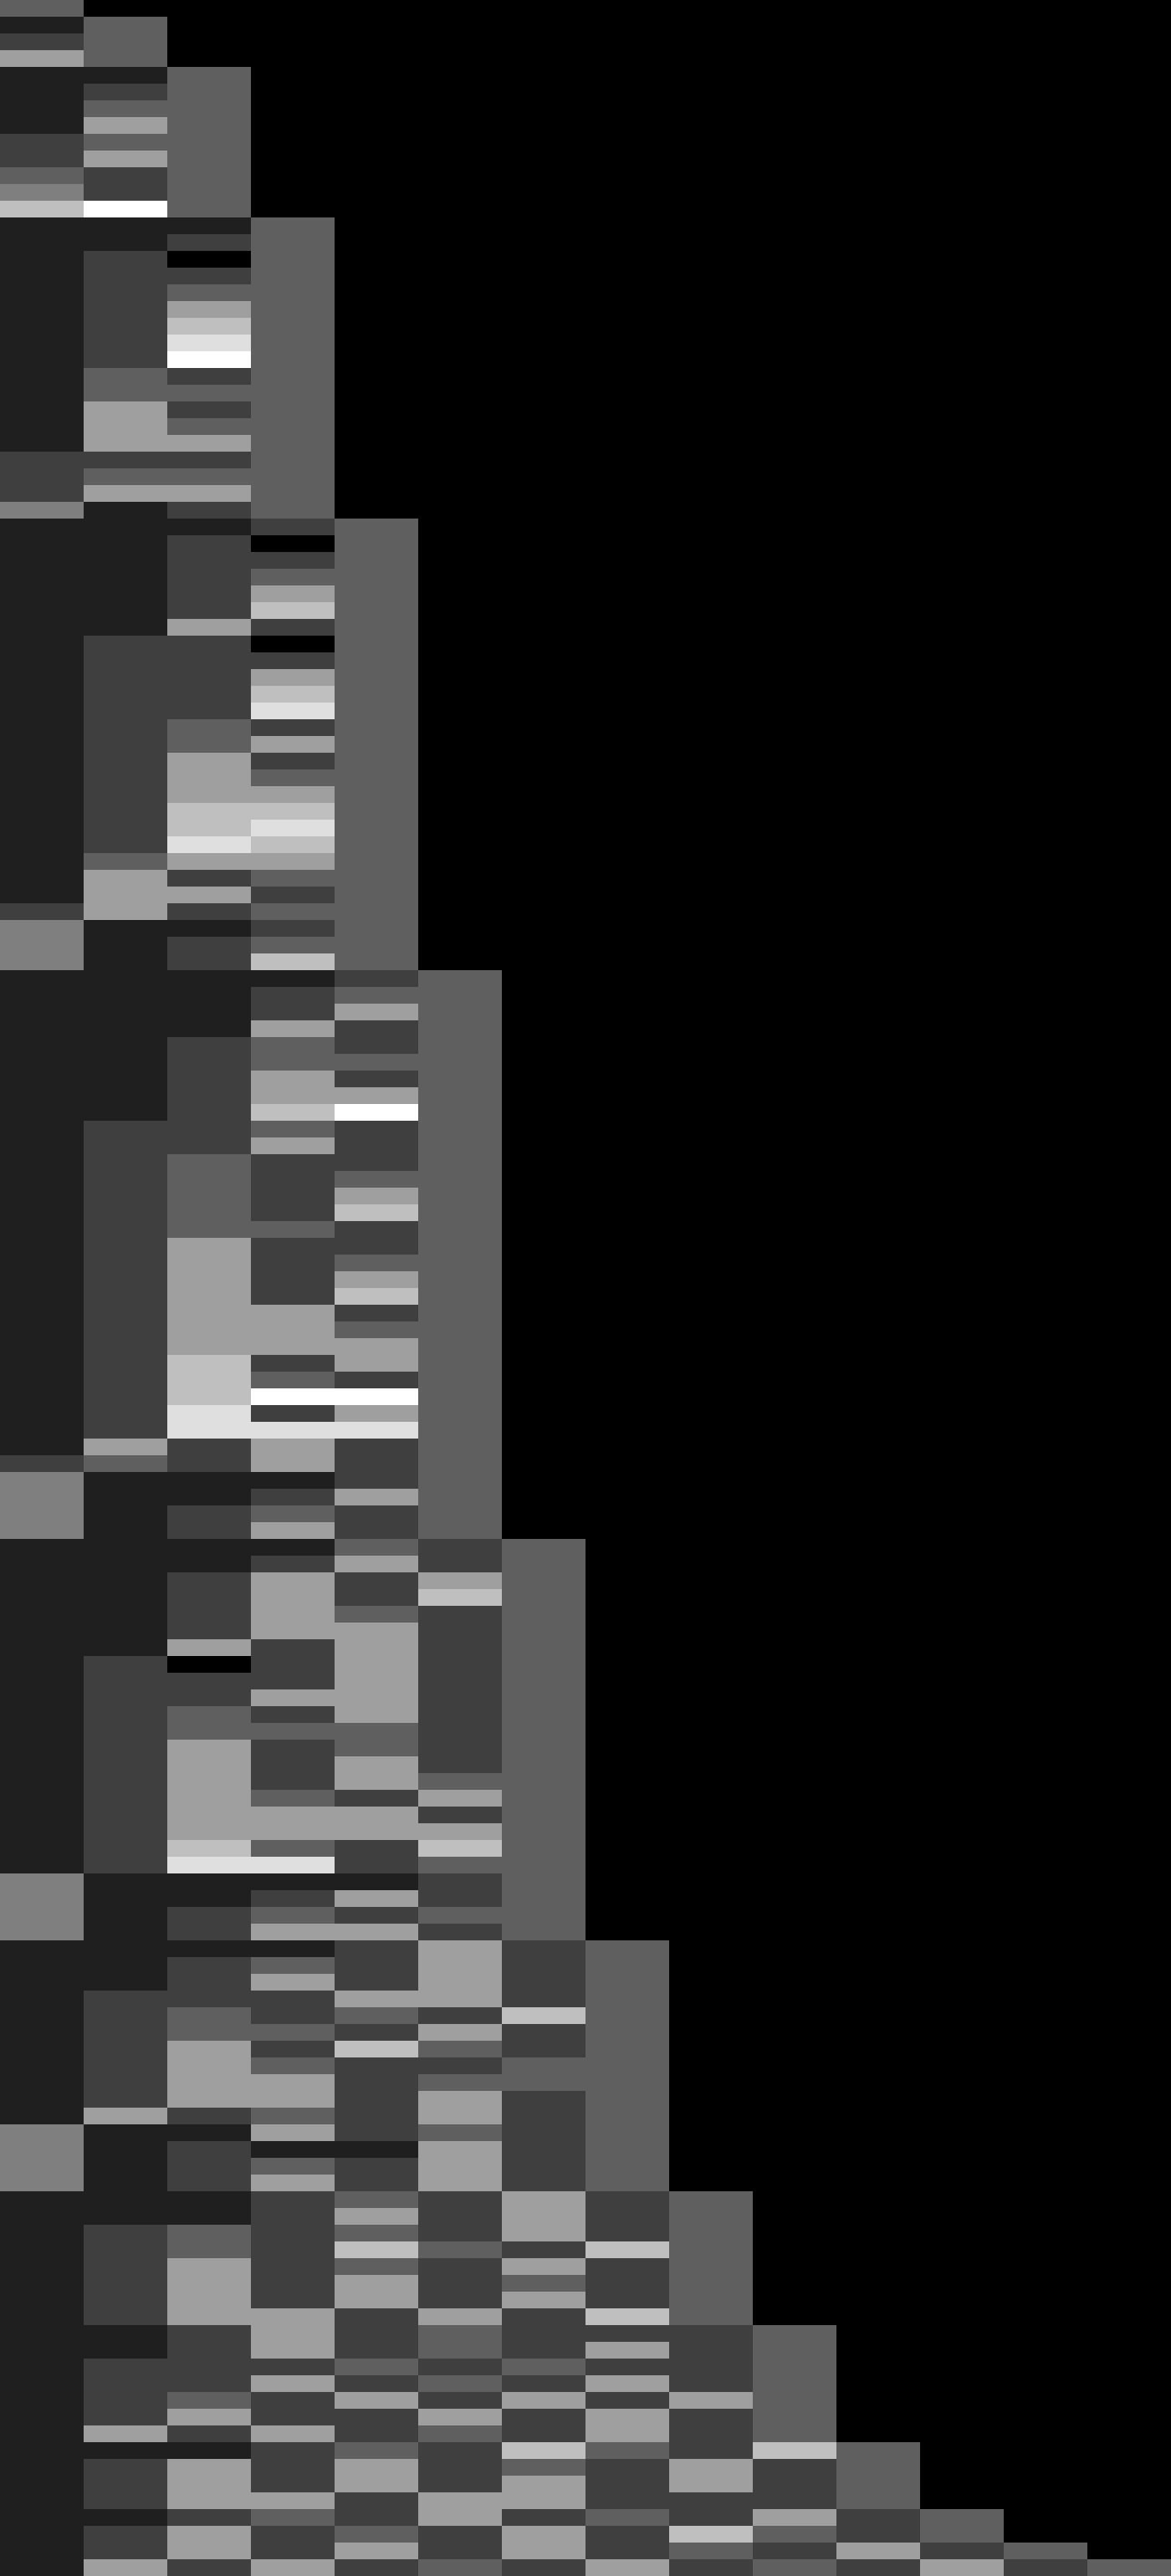

In [13]:
np_matrix = np.asmatrix(np_case_logs)
np_matrix = np_matrix.astype("uint8")
norm_matrix = np_matrix.copy()
norm_matrix *= 255.0/norm_matrix.max()

print(norm_matrix)
A = np.squeeze(np.asarray(norm_matrix)) 
img = Image.fromarray(A)
#img = img.rotate(90, Image.NEAREST, expand = 1)

img = img.resize((img.size[0]*100, img.size[1]*20),Image.NEAREST)

img

In [14]:
img.size

(1400, 3080)